In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

/tmp/ipykernel_1652346/3415317463.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data exploration

In [3]:
# read the data
df = pd.read_csv('data.csv', parse_dates=True, na_values={'price':0, 'bedrooms':0}) # remove 0 values from price and bedrooms

In [4]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4551 non-null   float64
 2   bedrooms       4598 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
# describe the data to get a sense of the distribution
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.551000e+03,4598.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.579059e+05,3.402349,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.639299e+05,0.906273,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,7.800000e+03,1.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### Data cleaning and visualizing

In [6]:
# check for number of na values
df.isna().sum()

date              0
price            49
bedrooms          2
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [7]:
## drop na values
# 51 rows with missing values will be dropped 49 price and 2 bedrooms
df.dropna(inplace=True)

In [8]:
df.shape

(4549, 18)

#### Remove outliers

In [9]:
# using z-score to remove outliers

# z-score is the number of standard deviations by which the value of an observation 
# or data point is above the mean value of what is being observed or measured
# z = (x - mean) / std

# calculate z-score
df['zscore_price'] = zscore(df['price'])
df['zscore_sqft_living'] = zscore(df['sqft_living'])
df['zscore_sqft_lot'] = zscore(df['sqft_lot'])
df['zscore_sqft_above'] = zscore(df['sqft_above'])
df['zscore_sqft_basement'] = zscore(df['sqft_basement'])


# using 3 to -3 as z-score threshold to remove outliers
df = df[(df['zscore_price'] < 3) & (df['zscore_price'] > -3)]
df = df[(df['zscore_sqft_living'] < 3) & (df['zscore_sqft_living'] > -3)]
df = df[(df['zscore_sqft_lot'] < 3) & (df['zscore_sqft_lot'] > -3)]
df = df[(df['zscore_sqft_above'] < 3) & (df['zscore_sqft_above'] > -3)]
df = df[(df['zscore_sqft_basement'] < 3) & (df['zscore_sqft_basement'] > -3)]

In [10]:
df.shape

(4361, 23)

In [11]:
# drop z-score columns
df.drop(columns=['zscore_price', 'zscore_sqft_living', 'zscore_sqft_lot', 'zscore_sqft_above', 'zscore_sqft_basement'], inplace=True)

In [12]:
df.shape

(4361, 18)

In [13]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.361000e+03,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000,4361.000000
mean,5.188209e+05,3.362990,2.110640,2042.627608,10688.168998,1.504357,0.004815,0.200413,3.453336,1753.710846,288.916762,1970.325384,813.535198
std,2.837418e+05,0.882343,0.720719,797.319997,12729.773715,0.538307,0.069234,0.702035,0.675718,749.303444,416.966221,29.853931,980.300135
min,7.800000e+03,1.000000,0.750000,370.000000,638.000000,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.225000e+05,3.000000,1.750000,1440.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,1170.000000,0.000000,1950.000000,0.000000
50%,4.550000e+05,3.000000,2.250000,1940.000000,7500.000000,1.500000,0.000000,0.000000,3.000000,1550.000000,0.000000,1974.000000,0.000000
75%,6.395000e+05,4.000000,2.500000,2540.000000,10375.000000,2.000000,0.000000,0.000000,4.000000,2220.000000,590.000000,1996.000000,1999.000000
max,2.199900e+06,9.000000,5.750000,4960.000000,120661.000000,3.500000,1.000000,4.000000,5.000000,4380.000000,1690.000000,2014.000000,2014.000000


In [14]:
# only 1 country is present
df.country.nunique()

1

In [15]:
df[df['statezip'].str[0:2] != 'WA'] # all the data is from Washington

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [16]:
df.city.nunique()

44

In [17]:
# dropping date, street, city, country and statezip columns because 
# they are not useful for the analysis
df.drop(columns=['date', 'street', 'city', 'country', 'statezip'], inplace=True)

In [18]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994


## Analysis and visualization

Text(0.5, 1.0, 'Number of bedrooms vs Number of houses')

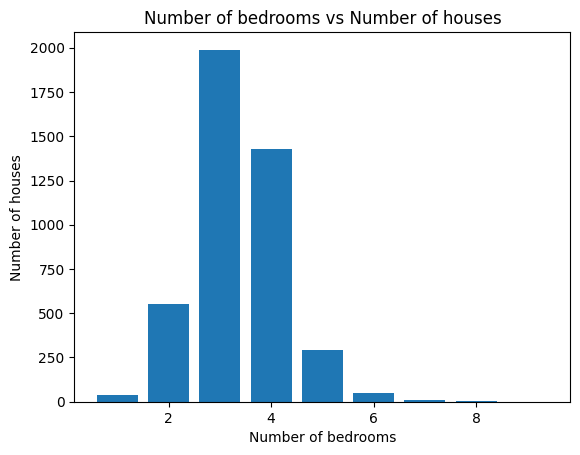

In [19]:
# plot the distribution of the number of bedrooms in the dataset using a bar plot
# to see the number of houses with different number of bedrooms

plt.bar(
    df.bedrooms.value_counts().index, # number of bedrooms
    df.bedrooms.value_counts().values, # count of houses
)

plt.xlabel('Number of bedrooms')
plt.ylabel('Number of houses')
plt.title('Number of bedrooms vs Number of houses')

Text(0.5, 1.0, 'Number of Bathrooms vs Number of houses')

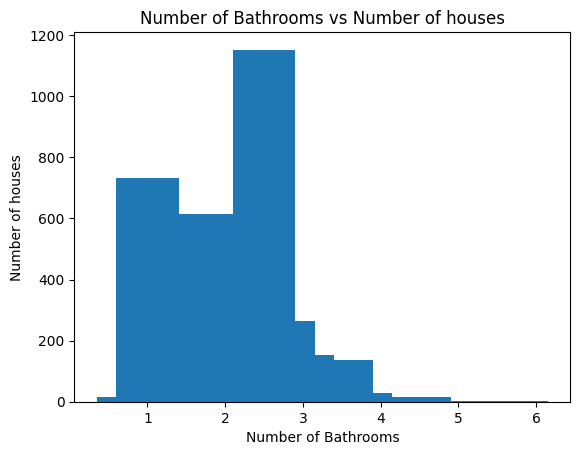

In [20]:
# plot the distribution of the number of bathrooms in the dataset using a bar plot
# to see the number of houses with different number of bathrooms

plt.bar(
    df.bathrooms.value_counts().index, # number of bathrooms
    df.bathrooms.value_counts().values, # count of houses
)

plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of houses')
plt.title('Number of Bathrooms vs Number of houses')

Text(0.5, 1.0, 'Price vs Square feet of living area')

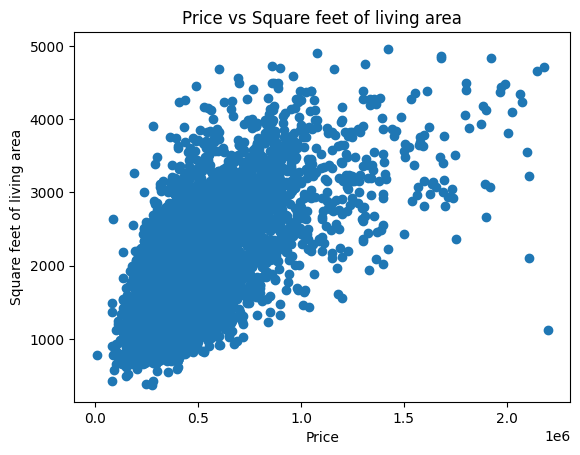

In [21]:
# plot ditrubution of the price with square feet of living area using scatter plot
# to see the relationship between price and square feet of living area

plt.scatter(
    df.price,
    df.sqft_living,
)
plt.xlabel('Price')
plt.ylabel('Square feet of living area')
plt.title('Price vs Square feet of living area')

Text(0.5, 1.0, 'Square feet of lot area vs Price')

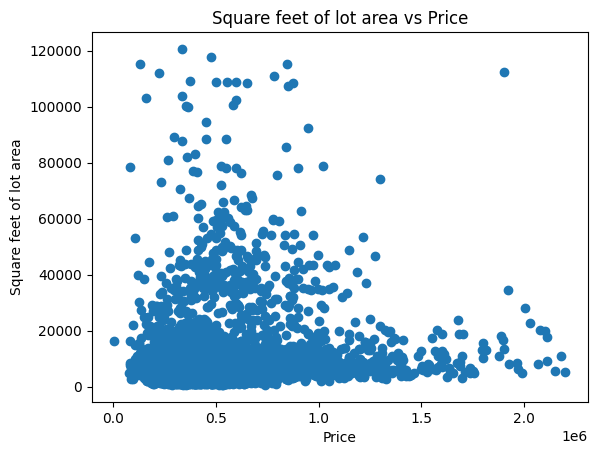

In [22]:
# plot ditrubution of the price with square feet of lot area using scatter plot
# to see the relationship between price and square feet of lot area

plt.scatter(
    df.price,
    df.sqft_lot,
)

plt.xlabel('Price')
plt.ylabel('Square feet of lot area')
plt.title('Square feet of lot area vs Price')

Text(0.5, 1.0, 'Number of floor vs Number of houses')

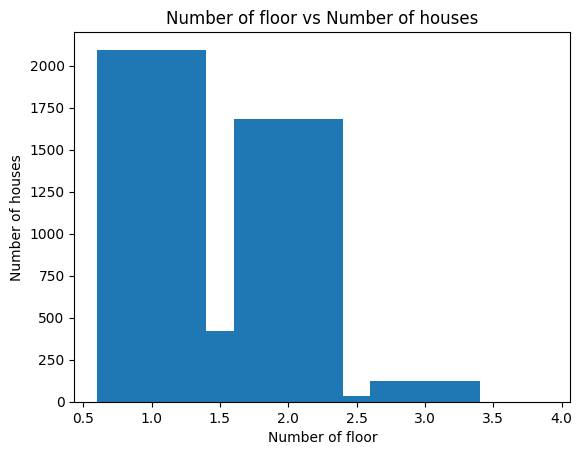

In [23]:
# plot ditrubution of floors using bar plot

plt.bar(
    df.floors.value_counts().index, # number of floors
    df.floors.value_counts().values, # count of houses
)

plt.xlabel('Number of floor')
plt.ylabel('Number of houses')
plt.title('Number of floor vs Number of houses')

([<matplotlib.patches.Wedge at 0x7f3526da0c10>,
 [Text(-1.099874130987381, 0.016640191848463076, '0'),
  Text(1.0998741314985885, -0.016640158058922834, '1')],
 [Text(-0.599931344174935, 0.00907646828097986, '99.5%'),
  Text(0.5999313444537754, -0.009076449850321544, '0.5%')])

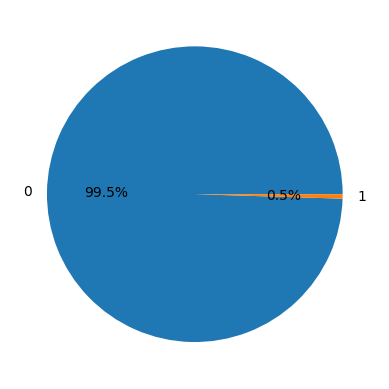

In [24]:
# plot ditrubution of waterfront using pie plot
# to see the percentage of houses with waterfront

plt.pie(
    df.waterfront.value_counts().values,
    labels=df.waterfront.value_counts().index, 
    autopct='%1.1f%%'
)

Text(0.5, 1.0, 'Number of views vs Number of houses')

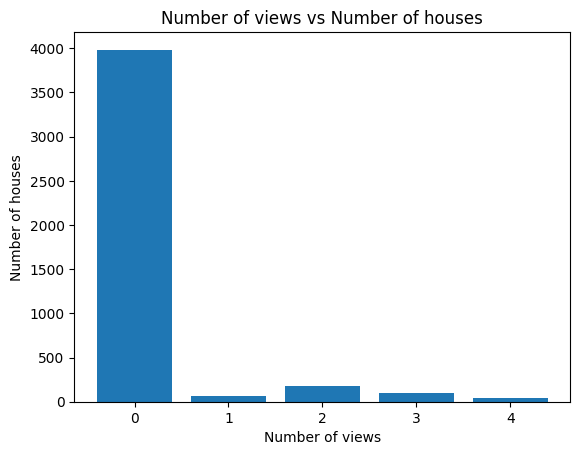

In [25]:
# plot ditrubution of view using bar plot
# to see the number of houses with different number of views

plt.bar(
    df.view.value_counts().index, # number of views
    df.view.value_counts().values, # count of houses
)

plt.xlabel('Number of views')
plt.ylabel('Number of houses')
plt.title('Number of views vs Number of houses')

Text(0.5, 1.0, 'Condition vs Number of houses')

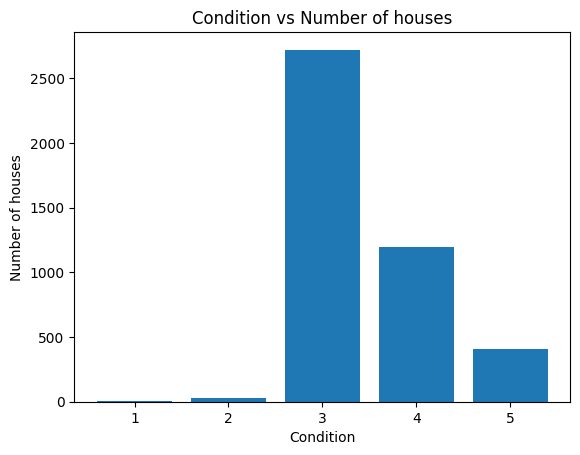

In [26]:
# plot ditrubution of condition using bar plot
# to see the number of houses with different conditions

plt.bar(
    df.condition.value_counts().index, # condition
    df.condition.value_counts().values, # count of houses
)

plt.xlabel('Condition')
plt.ylabel('Number of houses')
plt.title('Condition vs Number of houses')

Text(0.5, 1.0, 'Price vs Square feet above')

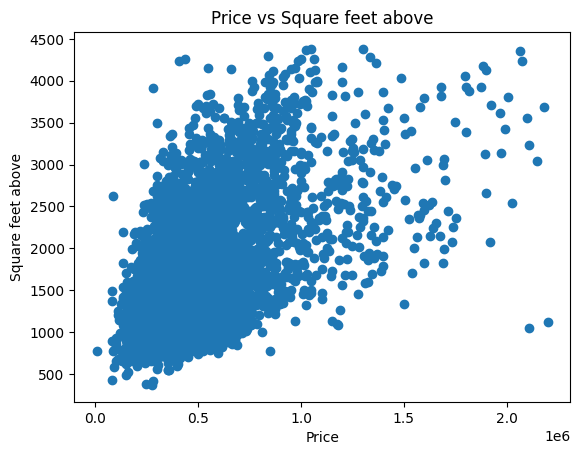

In [27]:
# plot ditrubution of sqft above using bar plot
# to see the relationship between price and square feet above

plt.scatter(
    df.price,
    df.sqft_above,
)

plt.xlabel('Price')
plt.ylabel('Square feet above')
plt.title('Price vs Square feet above')

Text(0.5, 1.0, 'Price vs Square feet basement')

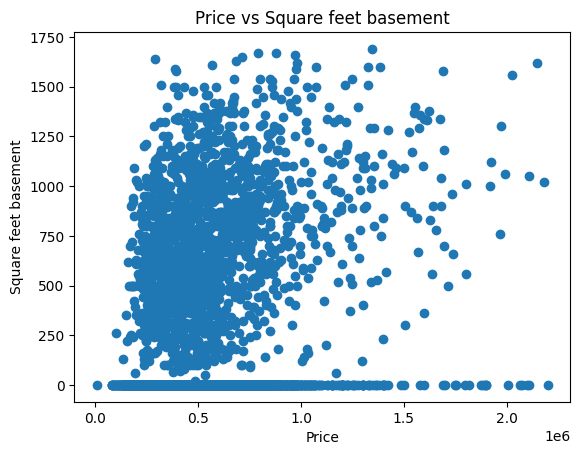

In [28]:
# plot ditrubution of sqft basement using bar plot
# to see the relationship between price and square feet basement

plt.scatter(
    df.price,
    df.sqft_basement,
)

plt.xlabel('Price')
plt.ylabel('Square feet basement')
plt.title('Price vs Square feet basement')

Text(0.5, 1.0, 'Year built vs Number of houses')

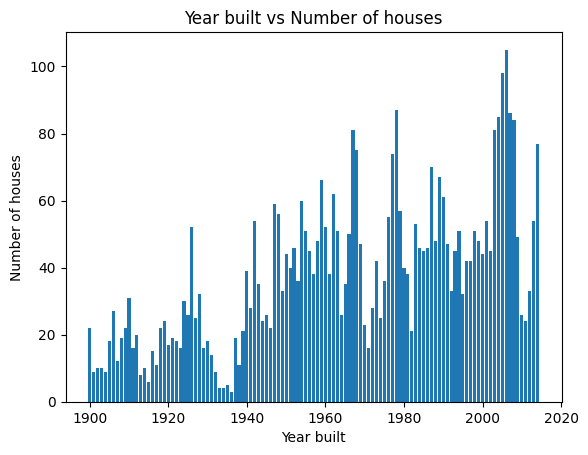

In [29]:
# plot ditrubution of yr_built using bar plot
# to see the number of houses built in different years

plt.bar(
    df.yr_built.value_counts().index, # year built
    df.yr_built.value_counts().values, # count of houses
)

plt.xlabel('Year built')
plt.ylabel('Number of houses')
plt.title('Year built vs Number of houses')

In [30]:
# correlation matrix
# to see the relationship between the variables in the dataset

df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.316043,0.481310,0.646757,0.083618,0.272935,0.094054,0.342098,0.075476,0.541485,0.263655,0.000010,-0.046482
bedrooms,0.316043,1.000000,0.520756,0.601441,0.090173,0.170751,-0.032375,0.071368,0.024762,0.474981,0.296513,0.141124,-0.056829
bathrooms,0.481310,0.520756,1.000000,0.731481,0.081355,0.508499,0.018049,0.160719,-0.120087,0.653551,0.224278,0.484018,-0.225709
sqft_living,0.646757,0.601441,0.731481,1.000000,0.231571,0.357630,0.031822,0.237652,-0.054683,0.856423,0.373169,0.298669,-0.131851
sqft_lot,0.083618,0.090173,0.081355,0.231571,1.000000,-0.079021,0.080737,0.051644,0.028454,0.237392,0.016206,0.049750,0.002039
floors,0.272935,0.170751,0.508499,0.357630,-0.079021,1.000000,0.002514,0.011344,-0.278458,0.542286,-0.290650,0.471934,-0.241605
waterfront,0.094054,-0.032375,0.018049,0.031822,0.080737,0.002514,1.000000,0.329335,0.021963,0.013755,0.036132,-0.041816,0.016467
view,0.342098,0.071368,0.160719,0.237652,0.051644,0.011344,0.329335,1.000000,0.063233,0.106315,0.263385,-0.084039,0.031524
condition,0.075476,0.024762,-0.120087,-0.054683,0.028454,-0.278458,0.021963,0.063233,1.000000,-0.184295,0.226621,-0.398429,-0.188259
sqft_above,0.541485,0.474981,0.653551,0.856423,0.237392,0.542286,0.013755,0.106315,-0.184295,1.000000,-0.159389,0.428019,-0.171985


## Data preprocessing

In [31]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

### spliting data for training and test using train_test_split

In [32]:
X = df.iloc[:, 1:].values # independent variables, storing as numpy array
y = df.iloc[:, 0].values # dependent variable, storing as numpy array

# split the data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature scaling (Standardization)

In [33]:
scalingX = StandardScaler()

# scale the data
# to make the data have a mean of 0 and a standard deviation of 1

# leaving the waterfront and yr renovated columns because they are not related to price
X_train[:, 0:5] = scalingX.fit_transform(X_train[:, 0:5])
X_test[:, 0:5] = scalingX.transform(X_test[:, 0:5])
X_train[:, 6:11] = scalingX.fit_transform(X_train[:, 6:11])
X_test[:, 6:11] = scalingX.transform(X_test[:, 6:11])

# scaling the y values

scalingY = StandardScaler()
y_train = scalingY.fit_transform(y_train.reshape(-1, 1)).flatten() # reshape the y_train to 1D array

## Regression models

### mutliple Linear regression

#### Training the model

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

#### Evaluating the model

In [35]:
# predict the test and train set
y_pred = lin_reg.predict(X_test)
y_train_pred = lin_reg.predict(X_train)

# calculate the r2 score
r2_lin_train = r2_score(y_train, y_train_pred)
r2_lin_test = r2_score(y_test, scalingY.inverse_transform(y_pred.reshape(-1, 1))) # inverse the scaling to get the original value


print('R2 score for linear regression on train set:', r2_lin_train)
print('R2 score for linear regression on test set:', r2_lin_test)

# calculate the mean squared error
mse_lin_train = mean_squared_error(y_train, y_train_pred)
mse_lin_test = mean_squared_error(y_test, scalingY.inverse_transform(y_pred.reshape(-1, 1))) # inverse the scaling to get the original value

print('Mean squared error for linear regression on train set:', mse_lin_train)
print('Mean squared error for linear regression on test set:', mse_lin_test)

# high r2 score and low mean squared error indicates a good model
# but we got high mse on the test set which indicates overfitting

R2 score for linear regression on train set: 0.5279514495301159
R2 score for linear regression on test set: 0.5092048284764241
Mean squared error for linear regression on train set: 0.4720485504698843
Mean squared error for linear regression on test set: 41777971956.35527


In [36]:
print(scalingY.inverse_transform(y_pred.reshape(-1, 1))[0])
print(y_test[0])

[422356.85742703]
455000.0


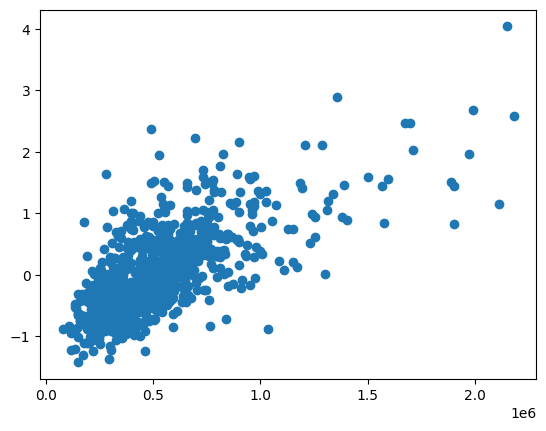

In [63]:
plt.scatter(
    y_test,
    y_pred
)

### polynomial regression

In [38]:
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

LinearRegression()

In [39]:
# predict the test and train set
y_pred = lin_reg_poly.predict(X_test_poly)
y_train_pred = lin_reg_poly.predict(X_train_poly)

# calculate the r2 score
r2_poly_train = r2_score(y_train,y_train_pred)
r2_poly_test = r2_score(y_test,scalingY.inverse_transform(y_pred.reshape(-1,1))) # inverse the scaling to get the original value

print("R2 Train Score:", r2_poly_train)
print("R2 Test Score:", r2_poly_test)

# calculate the mean squared error
mse_poly_train = mean_squared_error(y_train, y_train_pred)
mse_poly_test = mean_squared_error(y_test, scalingY.inverse_transform(y_pred.reshape(-1,1)))

print("Mean Squared Error of Train:", mse_poly_train)
print("Mean Squared Error of Test:", mse_poly_test)


R2 Train Score: 0.5674759743838549
R2 Test Score: 0.4814866913384048
Mean Squared Error of Train: 0.4325240256161452
Mean Squared Error of Test: 44137423766.85245


In [40]:
print(y_test[:10])
print(scalingY.inverse_transform(y_pred.reshape(-1, 1))[:10])

[455000. 356000. 435000. 354000. 545000. 465000. 499500. 415000. 315000.
 161700.]
[[412369.78518241]
 [481765.30746395]
 [356345.61997489]
 [260312.42611822]
 [560463.35161744]
 [647641.1266929 ]
 [657896.64711608]
 [277424.97047827]
 [405565.53125916]
 [346951.0439076 ]]


## Ridge

### Training the model

In [41]:
ridge = Ridge()
params_ridge = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}

ridge_regressor = GridSearchCV(ridge, params_ridge, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

/home/abhishek/bigoh/assignments/week4/saturday_test/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.14614e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/abhishek/bigoh/assignments/week4/saturday_test/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.71931e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/abhishek/bigoh/assignments/week4/saturday_test/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.25838e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/abhishek/bigoh/assignments/week4/saturday_test/.venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.3

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [42]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-0.4762984512902829


In [43]:
# predict the test and train set
y_pred = ridge_regressor.predict(X_test)
y_train_pred = ridge_regressor.predict(X_train)

# calculate the r2 score
r2_ridge_train = r2_score(y_train,y_train_pred)
r2_ridge_test = r2_score(y_test,scalingY.inverse_transform(y_pred.reshape(-1,1))) # inverse the scaling to get the original value

print("R2 Train Score:", r2_ridge_train)
print("R2 Test Score:", r2_ridge_test)

# calculate the mean squared error
mse_ridge_train = mean_squared_error(y_train, y_train_pred)
mse_ridge_test = mean_squared_error(y_test, scalingY.inverse_transform(y_pred.reshape(-1,1)))


print("Mean Squared Error of Train:", mse_ridge_train)
print("Mean Squared Error of Test:", mse_ridge_test)


R2 Train Score: 0.5279160536743097
R2 Test Score: 0.5094546517615498
Mean Squared Error of Train: 0.4720839463256904
Mean Squared Error of Test: 41756706241.43874


### Lasso

In [44]:
lasso = Lasso()
params_lasso = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso, params_lasso, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,y_train)

/home/abhishek/bigoh/assignments/week4/saturday_test/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.978e+02, tolerance: 2.751e-01
  model = cd_fast.enet_coordinate_descent(
/home/abhishek/bigoh/assignments/week4/saturday_test/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.452e+01, tolerance: 2.754e-01
  model = cd_fast.enet_coordinate_descent(
/home/abhishek/bigoh/assignments/week4/saturday_test/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to inc

/home/abhishek/bigoh/assignments/week4/saturday_test/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.628e+01, tolerance: 2.844e-01
  model = cd_fast.enet_coordinate_descent(
/home/abhishek/bigoh/assignments/week4/saturday_test/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.264e+01, tolerance: 2.805e-01
  model = cd_fast.enet_coordinate_descent(
/home/abhishek/bigoh/assignments/week4/saturday_test/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to inc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='neg_mean_squared_error')

In [45]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.47635337779062625


In [46]:
# predict the test and train set
y_pred = lasso_regressor.predict(X_test)
y_train_pred = lasso_regressor.predict(X_train)

# calculate the r2 score
r2_lasso_train = r2_score(y_train,y_train_pred)
r2_lasso_test = r2_score(y_test,scalingY.inverse_transform(y_pred.reshape(-1,1))) # inverse the scaling to get the original value

print("R2 Train Score:", r2_lasso_train)
print("R2 Test Score:", r2_lasso_test)

# calculate the mean squared error
mse_lasso_train = mean_squared_error(y_train, y_train_pred)
mse_lasso_test = mean_squared_error(y_test, scalingY.inverse_transform(y_pred.reshape(-1,1)))

print("Mean Squared Error of Train:", mse_lasso_train)
print("Mean Squared Error of Test:", mse_lasso_test)


R2 Train Score: 0.5278865333657121
R2 Test Score: 0.5091161369026324
Mean Squared Error of Train: 0.47211346663428794
Mean Squared Error of Test: 41785521651.82423


### Random forest

In [47]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

random = RandomForestRegressor(n_estimators=100, random_state=42)
random_model = GridSearchCV(random, param_grid, cv=5, scoring='neg_mean_squared_error')

random_model.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [48]:
print(random_model.best_params_)
print(random_model.best_score_)

{'max_depth': 10, 'n_estimators': 200}
-0.4698727902602674


In [49]:
# predict the test and train set
y_pred = random_model.predict(X_test)
y_train_pred = random_model.predict(X_train)

# calculate the r2 score
r2_random_train = r2_score(y_train,y_train_pred)
r2_random_test = r2_score(y_test,scalingY.inverse_transform(y_pred.reshape(-1,1))) # inverse the scaling to get the original value

print("R2 Train Score:", r2_random_train)
print("R2 Test Score:", r2_random_test)

# calculate the mean squared error
mse_random_train = mean_squared_error(y_train, y_train_pred)
mse_random_test = mean_squared_error(y_test, scalingY.inverse_transform(y_pred.reshape(-1,1)))

print("Mean Squared Error of Train:", mse_random_train)
print("Mean Squared Error of Test:", mse_random_test)


R2 Train Score: 0.8149984797576174
R2 Test Score: 0.4795785496696189
Mean Squared Error of Train: 0.18500152024238264
Mean Squared Error of Test: 44299850566.77354


### Decision Tree Regressor

In [50]:
dec_tree = DecisionTreeRegressor()
param_grid = {
    'max_depth': [None, 10, 20, 30]
}

dec_tree_model = GridSearchCV(dec_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

dec_tree_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30]},
             scoring='neg_mean_squared_error')

In [51]:
print(dec_tree_model.best_params_)
print(dec_tree_model.best_score_)

{'max_depth': 10}
-0.7244111591555421


In [52]:
# predict the test and train set
y_pred = dec_tree_model.predict(X_test)
y_train_pred = dec_tree_model.predict(X_train)

# calculate the r2 score
r2_dec_tree_train = r2_score(y_train,y_train_pred)
r2_dec_tree_test = r2_score(y_test,scalingY.inverse_transform(y_pred.reshape(-1,1))) # inverse the scaling to get the original value

print("R2 Train Score:", r2_dec_tree_train)
print("R2 Test Score:", r2_dec_tree_test)

# calculate the mean squared error
mse_dec_tree_train = mean_squared_error(y_train, y_train_pred)
mse_dec_tree_test = mean_squared_error(y_test, scalingY.inverse_transform(y_pred.reshape(-1,1)))

print("Mean Squared Error of Train:", mse_dec_tree_train)
print("Mean Squared Error of Test:", mse_dec_tree_test)


R2 Train Score: 0.8048381843909554
R2 Test Score: 0.2970091367177219
Mean Squared Error of Train: 0.19516181560904458
Mean Squared Error of Test: 59840712125.60859


### svr support vector regression

In [53]:
svr = SVR(kernel='linear')
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [54]:
# predict the test and train set
y_pred = svr.predict(X_test)
y_train_pred = svr.predict(X_train)

# calculate the r2 score
r2_svr_train = r2_score(y_train,y_train_pred)
r2_svr_test = r2_score(y_test,scalingY.inverse_transform(y_pred.reshape(-1,1))) # inverse the scaling to get the original value

print("R2 Train Score:", r2_svr_train)
print("R2 Test Score:", r2_svr_test)

# calculate the mean squared error
mse_svr_train = mean_squared_error(y_train, y_train_pred)
mse_svr_test = mean_squared_error(y_test, scalingY.inverse_transform(y_pred.reshape(-1,1)))

print("Mean Squared Error of Train:", mse_svr_train)
print("Mean Squared Error of Test:", mse_svr_test)


R2 Train Score: 0.5150377111633024
R2 Test Score: 0.4865262162847308
Mean Squared Error of Train: 0.48496228883669773
Mean Squared Error of Test: 43708444135.23266
